# IMAGE CLASSIFICATION WITH LOGISTIC REGRESSION

# IMPORT LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
from PIL import Image

In [2]:
import warnings
warnings.filterwarnings("ignore")

# LOAD DATA

In [3]:
train_messy = "C:\\Users\\Nikhil Garg\\Downloads\\Internship Project\\train\\messy"
train_clean= "C:\\Users\\Nikhil Garg\\Downloads\\Internship Project\\train\\clean"
test_messy= "C:\\Users\\Nikhil Garg\\Downloads\\Internship Project\\val\\messy"
test_clean= "C:\\Users\\Nikhil Garg\\Downloads\\Internship Project\\val\\clean"
image_size = 128

# PRINT MESSY ROOM'S IMAGE

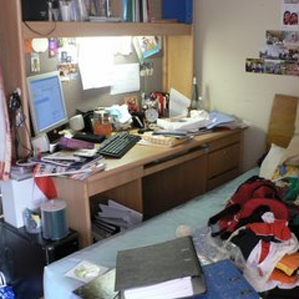

In [4]:
Image.open("C:\\Users\\Nikhil Garg\\Downloads\\Internship Project\\train\\messy\\89.png")

# PRINT CLEAN ROOM'S IMAGE

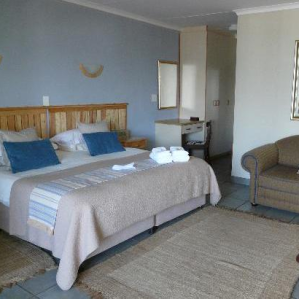

In [5]:
Image.open("C:\\Users\\Nikhil Garg\\Downloads\\Internship Project\\train\\clean\\70.png")

# CONVERTING IMAGE TO GRAYSCALE

In [6]:
import cv2
import os 

In [7]:
for image in tqdm(os.listdir(train_messy)): 
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)) 
    np_img=np.asarray(img)    

100%|█████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 105.37it/s]


Text(0.5, 1.0, 'Messy Room')

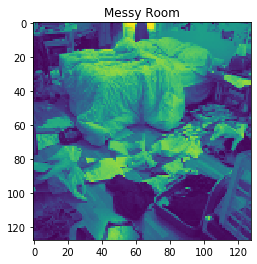

In [8]:
plt.imshow(np_img.reshape(image_size, image_size))
plt.title("Messy Room")

In [9]:
for image2 in tqdm(os.listdir(train_clean)): 
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size))
    np_img2=np.asarray(img2)

100%|█████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 116.56it/s]


Text(0.5, 1.0, 'Clean Room')

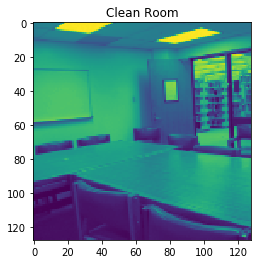

In [10]:
plt.imshow(np_img2.reshape(image_size, image_size))
plt.title("Clean Room")

# TRAIN DATA

In [11]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data 

# TEST DATA

In [12]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in tqdm(os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data 

In [13]:
train_data = train_data() 
test_data = test_data()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.71it/s]


# CONCATENATING TRAIN AND TEST DATA

In [14]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [15]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [16]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

# IMAGE SHAPE

In [17]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 128, 128)
Y shape:  (212, 1)


In [18]:
# SPLITTING TRAIN AND TEST DATA:-85% TRAIN AND 15% TEST
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

# CONVERTING INTO FEATURE VECTOR

In [19]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (180, 16384)
X test flatten (32, 16384)


# DIMENSION OF FEATURE VECTOR

In [20]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T

In [21]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 180)
x test:  (16384, 32)
y train:  (1, 180)
y test:  (1, 32)


# LOGISTIC REGRESSION

In [22]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

Cost after iteration 0: nan
Cost after iteration 100: 0.032316
Cost after iteration 200: 0.014960
Cost after iteration 300: 0.009692
Cost after iteration 400: 0.007167
Cost after iteration 500: 0.005685
Cost after iteration 600: 0.004711
Cost after iteration 700: 0.004022
Cost after iteration 800: 0.003510
Cost after iteration 900: 0.003114
Cost after iteration 1000: 0.002799
Cost after iteration 1100: 0.002543
Cost after iteration 1200: 0.002330
Cost after iteration 1300: 0.002151
Cost after iteration 1400: 0.001997


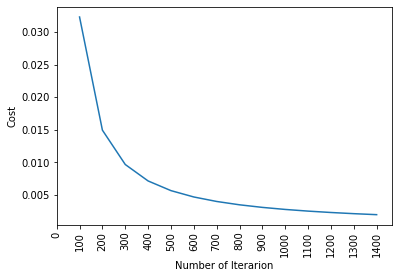

Test Accuracy: 90.62 %
Train Accuracy: 100.0 %


In [23]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)

# ACCURACY USING LOGREG MODEL

In [24]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.90625 
train accuracy: 1.0 


# OUTPUT PREDICTIONS MADE BY THE MODEL

In [25]:
pred =logreg.predict(x_test.T)

In [26]:
pred

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])

# ACTUAL OUTPUT

In [27]:
y_test

array([[1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
        0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.]])

# CONFUSION MATRIX 

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.T,pred)

array([[16,  2],
       [ 1, 13]], dtype=int64)

# CONFUSION MATRIX USING HEAT MAP VISUALISATION

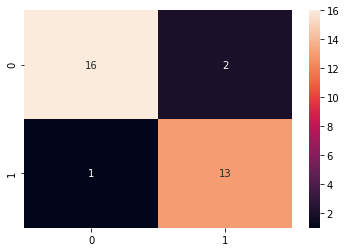

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
cm_dt= confusion_matrix(y_test.T,pred)
sns.heatmap(cm_dt, annot=True, fmt="d")


# <u>2 LAYER ANN MODEL IMPLEMENTATION

In [30]:
def parameter_initialize(x_train,y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0])*0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3)*0.1,
                  "bias2" : np.zeros((y_train.shape[0],1))}
    
    print("Shape of weight1 : ",parameters["weight1"].shape)
    print("Shape of weight2 : ",parameters["weight2"].shape)
    print("Shape of bias1 : ",parameters["bias1"].shape)
    print("Shape of bias2 : ",parameters["bias2"].shape)

    return parameters
parameter_initialize(x_train,y_train)

Shape of weight1 :  (3, 16384)
Shape of weight2 :  (1, 3)
Shape of bias1 :  (3, 1)
Shape of bias2 :  (1, 1)


{'weight1': array([[-0.11603398, -0.05762106,  0.04627276, ..., -0.10584286,
          0.01346291, -0.116897  ],
        [ 0.05075125,  0.02675363, -0.09653251, ...,  0.02588197,
         -0.06765157, -0.03207473],
        [ 0.01518978,  0.01071368, -0.00235627, ...,  0.0059488 ,
         -0.15978396, -0.02762375]]),
 'bias1': array([[0.],
        [0.],
        [0.]]),
 'weight2': array([[-0.05262727,  0.0294462 , -0.11368498]]),
 'bias2': array([[0.]])}

In [31]:
def forward_propagation(x_train,parameters):
    Z1 = np.dot(parameters["weight1"],x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    
    results = {"Z1": Z1, "A1":A1,"Z2":Z2,"A2":A2}
    return A2, results

# COST FUNCTION FOR LOGISTIC REGRESSION

In [32]:
def cost(A2,Y):
    logaritmic_probability = np.multiply(np.log(A2),Y)  #loss function 
    cost = -np.sum(logaritmic_probability)/Y.shape[1]
    return cost

# BACKWARD PROPAGATION

In [33]:
def backward_propagation(parameters,results,X,Y):
    dZ2 = results["A2"]-Y
    dW2 = np.dot(dZ2,results["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2, axis = 1, keepdims = True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1-np.power(results["A1"],2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1, axis=1,keepdims = True)/X.shape[1]
    gradients = {"dweight1": dW1,
                "dweight2": dW2,
                "dbias1": db1,
                "dbias2":db2}
    return gradients

# UPDATE PARAMETERS

In [34]:
def update_prameters(parameters,grand,learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grand["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grand["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grand["dweight2"],
                  "bias2" : parameters["bias2"]-learning_rate*grand["dbias2"]
                 }
    return parameters

In [35]:
def prediction(parameters, x_test):
    A2, results = forward_propagation(x_test,parameters)
    prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(A2.shape[1]):
        if A2[0,i] <= 0.5:
            prediction[0,i] = 0
        else:
            prediction[0,i] = 1
    return prediction

Shape of weight1 :  (3, 16384)
Shape of weight2 :  (1, 3)
Shape of bias1 :  (3, 1)
Shape of bias2 :  (1, 1)
Cost after iteration 0 0.444809
Cost after iteration 100 0.193586
Cost after iteration 200 0.135260
Cost after iteration 300 0.099500
Cost after iteration 400 0.079330
Cost after iteration 500 0.066781
Cost after iteration 600 0.057804
Cost after iteration 700 0.051147
Cost after iteration 800 0.046198
Cost after iteration 900 0.042381
Cost after iteration 1000 0.040790
Cost after iteration 1100 0.036479
Cost after iteration 1200 0.033864
Cost after iteration 1300 0.031752
Cost after iteration 1400 0.029967
Cost after iteration 1500 0.028418
Cost after iteration 1600 0.027024
Cost after iteration 1700 0.025146
Cost after iteration 1800 0.021881
Cost after iteration 1900 0.020840


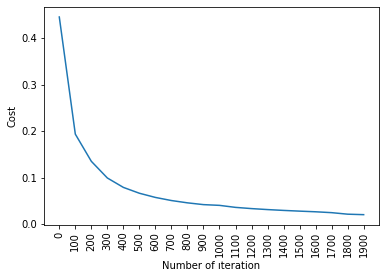

train accuracy: 99.44444444444444 %
test accuracy: 90.625 %


In [36]:
def two_layer_ANN_model(x_train, y_train, x_test, y_test, number_of_iteration):
    cost_list = []
    index = []
    parameters = parameter_initialize(x_train,y_train)
    for i in range(number_of_iteration):
        A2, results = forward_propagation(x_train,parameters)
        cost_result = cost(A2,y_train)
        gradients = backward_propagation(parameters,results,x_train,y_train)
        parameters = update_prameters(parameters, gradients)
        
        if i % 100 == 0:
            cost_list.append(cost_result)
            index.append(i)
            print("Cost after iteration %i %f" %(i,cost_result))
    plt.plot(index,cost_list)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of ıteration")
    plt.ylabel("Cost")
    plt.show()
    y_prediction_test = prediction(parameters,x_test)
    y_prediction_train = prediction(parameters,x_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_ANN_model(x_train,y_train,x_test,y_test,2000)

# THANK YOU